# Deep Convolutional Generatative Adversarial Network

*Source: https://www.tensorflow.org/alpha/tutorials/generative/dcgan*

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import sys
#!{sys.executable} -m pip install tensorflow-gpu==2.0.0-alpha0

In [3]:
import tensorflow as tf

------------------------
# IMPORTANT DELTA
This is where we enable [eager execution](https://www.tensorflow.org/guide/eager)

In [4]:
tf.enable_eager_execution()

In [6]:
tf.executing_eagerly()

True

--------------------------------

In [7]:
!{sys.executable} -m pip install imageio

In [8]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [9]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

In [12]:
train_images.shape

(60000, 28, 28, 1)

In [13]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [14]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [15]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
      
    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size
    
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)  
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)    
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)
  
    return model

Instructions for updating:
Colocations handled automatically by placer.


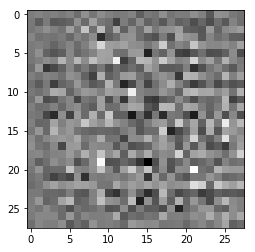

In [16]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

generated_image[0, :, :, 0]

plt.imshow(generated_image[0, :, :, 0], cmap='gray')


In [17]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    
    return model

In [18]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)

print (decision)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
tf.Tensor([[0.00203214]], shape=(1, 1), dtype=float32)
